<a href="https://colab.research.google.com/github/namelessCrusader/Diabetic-Retinopathy-Detection/blob/main/DiabeticRetinopathy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a Kaggle key and place it in your root directory the colab notebook starts in in order to be able to interact with the kaggle apis. And then run this code. If its a competition dataset you may need to accept their terms and conditions from the account you made the api Key from. 

In [ ]:
#download relevant dataset from kaggle, refer to text above in cases of errors
!mkdir -p ~/.kaggle
!cp "/content/kaggle.json" ~/.kaggle/
!cat ~/.kaggle/kaggle.json 
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c aptos2019-blindness-detection -p Dataset

In [1]:
#to load dataset from drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [8]:
# importing the libraries
import pandas as pd
import numpy as np

# for reading and displaying images
import skimage
import matplotlib.pyplot as plot
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

#base python libraries
import os

#GlobalVariables
SEED = 5000

In [4]:
#load kaggle dataset to local variable
train=pd.read_csv("/content/Dataset/train.csv")
test=pd.read_csv("/content/Dataset/test.csv")

x = train['id_code']
y = train['diagnosis']
train.head()
test.head()


FileNotFoundError: ignored

In [5]:
#load dataset from drive to local variable
train=pd.read_csv("/content/drive/MyDrive/APTOS/train.csv")
test=pd.read_csv("/content/drive/MyDrive/APTOS/test.csv")

x = train['id_code']
y = train['diagnosis']


,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


In [6]:
train.head()


,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [10]:
listing = os.listdir("/content/drive/MyDrive/APTOS/train_images")

In [14]:
#Make a copy of dataset on colab storage, may take 5-10 minutes
!mkdir /content/APTOS
!mv /content/drive/MyDrive/APTOS/train_images /content/APTOS


mkdir: cannot create directory ‘/content/APTOS’: File exists
mkdir: cannot create directory ‘/content/APTOS/train_images’: File exists
mkdir: cannot create directory ‘/content/APTOS/train_images/0’: File exists
mkdir: cannot create directory ‘/content/APTOS/train_images/1’: File exists
mkdir: cannot create directory ‘/content/APTOS/train_images/2’: File exists
mkdir: cannot create directory ‘/content/APTOS/train_images/3’: File exists
mkdir: cannot create directory ‘/content/APTOS/train_images/4’: File exists


In [ ]:
!mv /content/drive/MyDrive/APTOS/train_images /content/APTOS

In [17]:
base_dir = "/content/APTOS/train_images/"

for file in listing:
    try:
        fileName = os.path.splitext(file)[0]
        folder_name = trainLabels.loc[trainLabels.image==fileName, 'level'].values[0]  
        os.rename(base_dir + file, base_dir + str(folder_name) + "/" + file )
    except:
        print("error")
        pass

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

(3112,) (3112,) (550,) (550,)


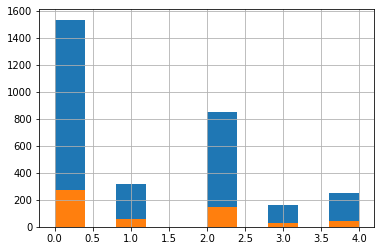

In [ ]:
#Image distribution between class labels
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.15,stratify=y, random_state=SEED)
print(train_x.shape, train_y.shape, valid_x.shape, valid_y.shape)
train_y.hist()
valid_y.hist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


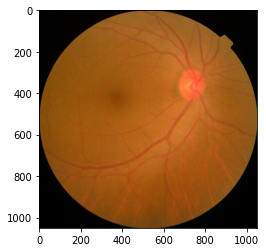

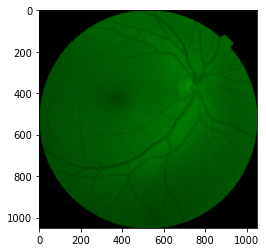

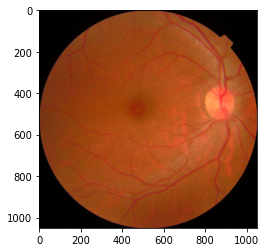

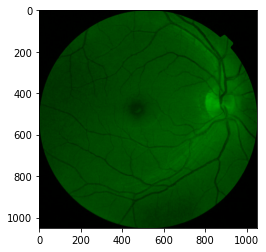

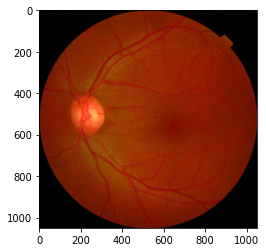

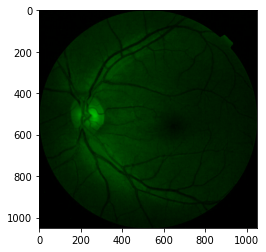

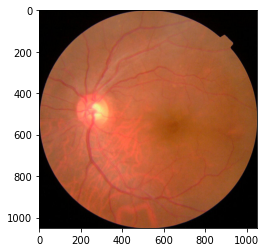

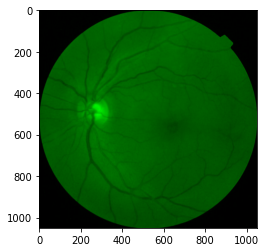

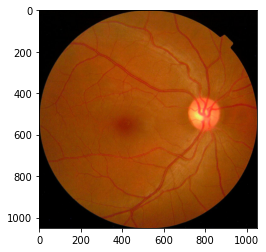

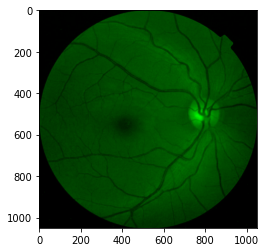

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


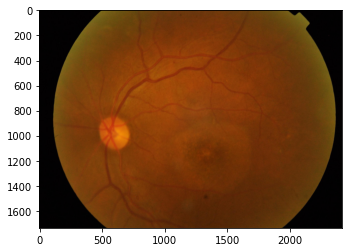

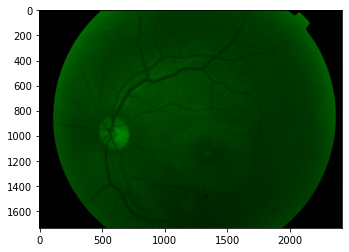

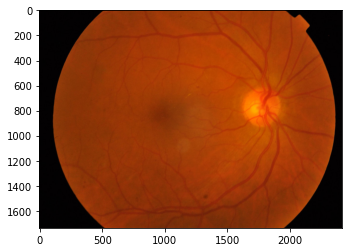

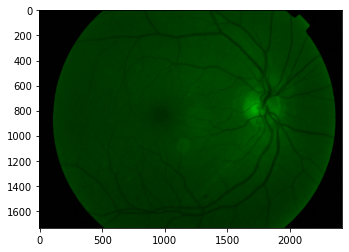

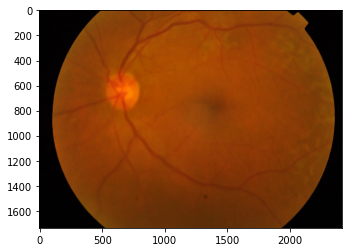

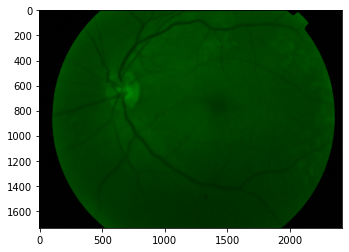

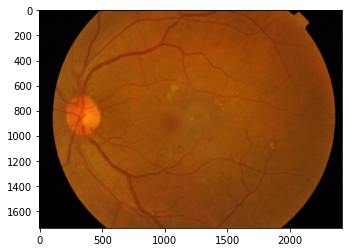

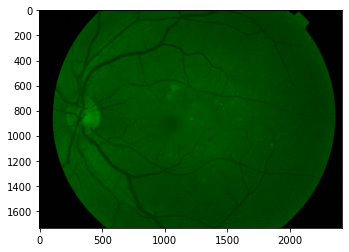

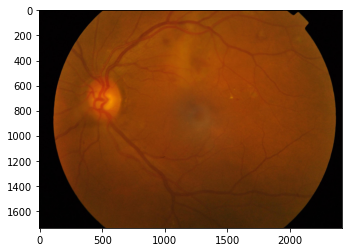

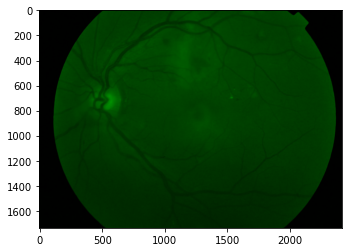

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: ignored

In [ ]:
for class_id in sorted(train_y.unique()):
    for i, (idx, row) in enumerate(train.loc[train['diagnosis'] == class_id].sample(5, random_state=SEED).iterrows()):
        ax = fig.add_subplot(5, 5, class_id * 5 + i + 1, xticks=[], yticks=[])
        path=f"/content/drive/MyDrive/APTOS/train_images/{row['id_code']}.png"
        RGB_channel= io.imread(path)
        plot.imshow(RGB_channel)
        plot.show()
        green_image = RGB_channel.copy() # Make a copy 
        #Remove Red and Blue Channel
        green_image[:,:,0] = 0
        green_image[:,:,2] = 0
        plot.imshow(green_image,cmap='gray')
        plot.show()
        #EImage = skimage.color.rgb2gray(green_image) #enhanced image
        #plot.imshow(EImage)
        #plot.show()
        #EImage = skimage.color.rgb2gray(RGB_channel) #enhanced image
        #plot.imshow(EImage)
        #plot.show()
        

      